## Installing required libraries:

In [1]:
%%capture
#to hide the output of cell
!pip install matplotlib numpy sympy sklearn

### Notebook imports:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm #Color map

from sympy import symbols, diff

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from datetime import datetime

%matplotlib inline
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that 
# produced it. The resulting plots will then also be stored in the notebook document.

### Simple Gradient Descent:

Cost function: $f(x) = x^2 + x + 1$

In [3]:
#Function definition:
def f(x):
    return x**2 + x + 1

In [4]:
#Generating data:
x_1 = np.linspace(start = -3, stop = 3, num = 500)

In [5]:
#df(x), function to calculate the derivative of f(x):
def df(x):
    return 2*x + 1

In [6]:
#Gradient Descent
new_x = 3
prev_x = 0
alpha = 0.1 #Step multiplier
precision = 0.00001

#Starting values of lists:
x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - gradient*alpha
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - prev_x)
    
    if(step_size < precision):
        print('No. of times ran:', n)
        break

print('The local minimum reached:', new_x)
print('The slope (differential) at local minimum:', df(new_x))
print('The Cost at local minimum:', f(new_x))

No. of times ran: 50
The local minimum reached: -0.49996003706460423
The slope (differential) at local minimum: 7.992587079153068e-05
The Cost at local minimum: 0.7500000015970362


### Multiple minima vs. Initial guess & Advanced functions:

Cost function: $f(x) = x^4 - 4x^2 + 5$

In [7]:
#Making sample data:
x_2 = np.linspace(-2, 2, 1000)

#Cost function g(x):
def g(x):
    return x**4 - 4*(x**2) + 5

#Derivative of cost function:
def dg(x):
    return 4*(x**3) - 8*x

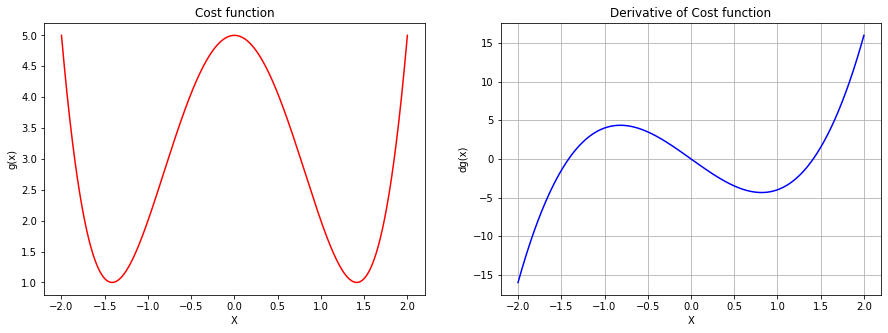

In [8]:
#Plotting cost function & derivative of cost function side by side:

plt.figure(figsize = [15, 5]) #Setting height & width of plot to 15X5.

#figure 1 (cost function):
plt.subplot(1, 2, 1) #(row, column, index)
plt.xlabel('X')
plt.ylabel('g(x)')
plt.title('Cost function')
plt.plot(x_2, g(x_2), color = 'red')

#figure 2 (derivative of cost function):
plt.subplot(1, 2, 2) #(row, column, index)
plt.xlabel('X')
plt.ylabel('dg(x)')
plt.title('Derivative of Cost function')
plt.plot(x_2, dg(x_2), color = 'blue')
plt.grid()

#Show both the plots:
plt.show()

Gradient Descent as a Python Function:

Fun fact: to indent a whole group in python you can use `ctrl + ]` or `tab`, after selecting the group

In [9]:
#In python, function are stored as objects too, so we can easily pass them through functions like derivative_func below:
def gradient_descent(derivative_func, initial_guess, multiplier = 0.01, precision = 0.00001, max_iter = 300):
    new_x = initial_guess

    #Starting values of lists:
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        prev_x = new_x
        gradient = derivative_func(prev_x)
        new_x = prev_x - gradient*multiplier

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        step_size = abs(new_x - prev_x)

        if(step_size < precision):
            break
    
    return new_x, x_list, slope_list #We are packing 3 values in a tuple, we cannot send multiple items as retuen from function

In [10]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0.5, multiplier = 0.02, precision = 0.001)
print('Local minimum occurs at:', local_min)
print('No of steps:', len(list_x))

Local minimum occurs at: 1.4122375085019094
No of steps: 23


In [11]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0.5)
print('Local minimum occurs at:', local_min)
print('No of steps:', len(list_x))

Local minimum occurs at: 1.4141668991848309
No of steps: 69


`Shift + Tab` helps pull up info about a function in jupyter

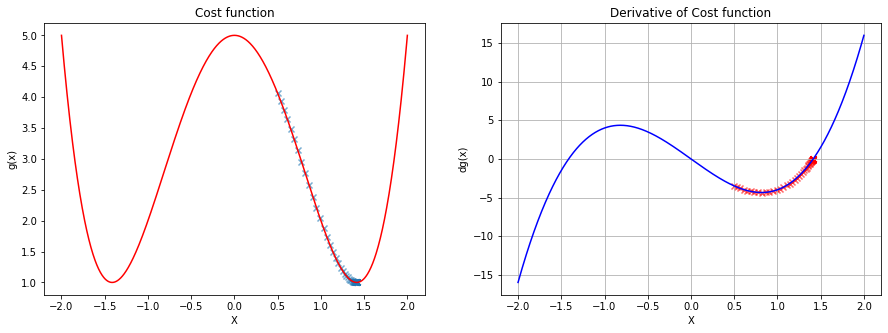

In [12]:
#Plotting gradient descent on cost & derivative function:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0.5)

plt.figure(figsize = [15, 5]) #Setting height & width of plot to 15X5.

#figure 1 (cost function):
plt.subplot(1, 2, 1) #(row, column, index)
plt.xlabel('X')
plt.ylabel('g(x)')
plt.title('Cost function')
plt.plot(x_2, g(x_2), color = 'red')
plt.scatter(list_x, g(np.array(list_x)), marker = 'x', alpha = 0.6)

#figure 2 (derivative of cost function):
plt.subplot(1, 2, 2) #(row, column, index)
plt.xlabel('X')
plt.ylabel('dg(x)')
plt.title('Derivative of Cost function')
plt.plot(x_2, dg(x_2), color = 'blue')
plt.scatter(list_x, deriv_list, marker = 'x', color = 'red', alpha = 0.6)
plt.grid()

#Show both the plots:
plt.show()

Note, in the above scenario, if we place initial guess as `0`, then we go nowhere in terms of descent, as gradient descent stops when the slope turns zero, but in our case, we are already at position where slope is 0, also, the above method would not be able to solve the problem of global/local minimum.
One simple solution is that try a few random initial guesses, if you land on the same minima each time, means it is the global minima (maybe not).

### Divergence, Overflow, & Python Tuples

Cost function: $h(x) = x^5 - 2x^4 + 2$

In [13]:
#Making data:
x_3 = np.linspace(-2.5, 2.5, 1000)

#Cost function:
def h(x):
    return x**5 - 2*(x**4) + 2

#Derivative function:
def dh(x):
    return 5*(x**4) - 8*(x**3)

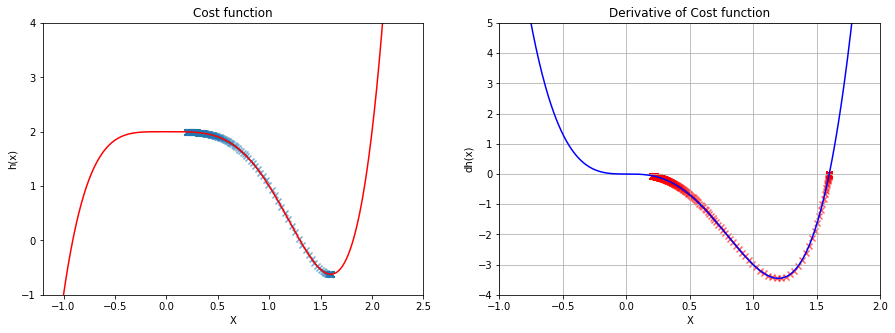

Local minimum occurs at: 1.5999683085016094
Cost at this minimum is: -0.6214399897158529
Number of steps: 249


In [14]:
#Plotting gradient descent on cost & derivative function:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = 0.2)

plt.figure(figsize = [15, 5]) #Setting height & width of plot to 15X5.

#figure 1 (cost function):
plt.subplot(1, 2, 1) #(row, column, index)
plt.xlabel('X')
plt.ylabel('h(x)')
plt.title('Cost function')
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.plot(x_3, h(x_3), color = 'red')
plt.scatter(list_x, h(np.array(list_x)), marker = 'x', alpha = 0.6)

#figure 2 (derivative of cost function):
plt.subplot(1, 2, 2) #(row, column, index)
plt.xlabel('X')
plt.ylabel('dh(x)')
plt.title('Derivative of Cost function')
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.plot(x_3, dh(x_3), color = 'blue')
plt.scatter(list_x, deriv_list, marker = 'x', color = 'red', alpha = 0.6)
plt.grid()

#Show both the plots:
plt.show()

print('Local minimum occurs at:', local_min)
print('Cost at this minimum is:', h(local_min))
print('Number of steps:', len(list_x))

In [15]:
#Get info about how many numbers can I run on my system:
import sys
#type(h(local_min))
print(sys.float_info.max)

1.7976931348623157e+308


In [16]:
#Checking for the max value (calculated above) exceeds in how many steps:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = -0.2, max_iter = 136)

print('Local minimum occurs at:', local_min)
print('Cost at this minimum is:', h(local_min))
print('Number of steps:', len(list_x))

Local minimum occurs at: -4.885583793105108e+53
Cost at this minimum is: -2.783442996149689e+268
Number of steps: 137


This is pretty much the limit, if we increase max_iter eben by 1 digit, it goes in overflow state

We can create a tuple (containing a single value) by adding a trailing `,`

In [17]:
#example:
tup = 12,
print(type(tup))
del tup

<class 'tuple'>


## Learning Rate

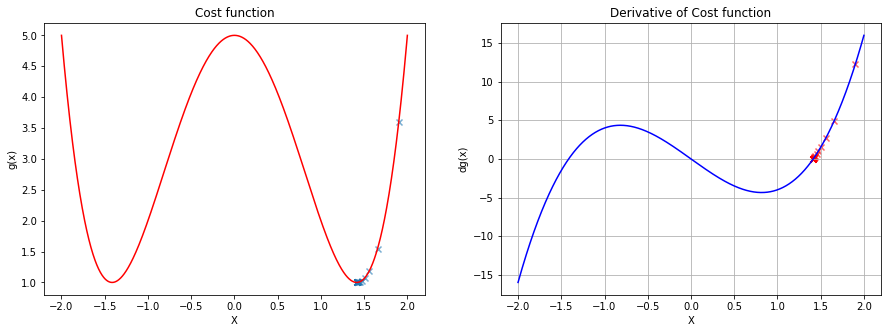

Number of steps: 26


In [18]:
#Plotting gradient descent on cost & derivative function:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 1.9, multiplier = 0.02)

plt.figure(figsize = [15, 5]) #Setting height & width of plot to 15X5.

#figure 1 (cost function):
plt.subplot(1, 2, 1) #(row, column, index)
plt.xlabel('X')
plt.ylabel('g(x)')
plt.title('Cost function')
plt.plot(x_2, g(x_2), color = 'red')
plt.scatter(list_x, g(np.array(list_x)), marker = 'x', alpha = 0.6)

#figure 2 (derivative of cost function):
plt.subplot(1, 2, 2) #(row, column, index)
plt.xlabel('X')
plt.ylabel('dg(x)')
plt.title('Derivative of Cost function')
plt.plot(x_2, dg(x_2), color = 'blue')
plt.scatter(list_x, deriv_list, marker = 'x', color = 'red', alpha = 0.6)
plt.grid()

#Show both the plots:
plt.show()

print('Number of steps:', len(list_x))

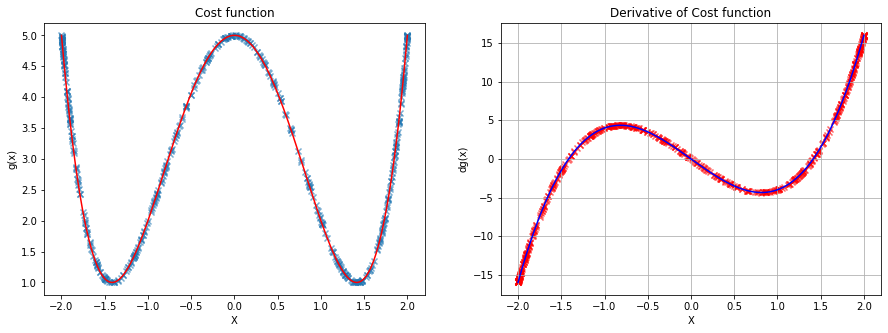

Number of steps: 501


In [19]:
#Plotting gradient descent on cost & derivative function:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 1.9, multiplier = 0.25, max_iter = 500) # <=Notice the multiplier here, 0.25!!

plt.figure(figsize = [15, 5]) #Setting height & width of plot to 15X5.

#figure 1 (cost function):
plt.subplot(1, 2, 1) #(row, column, index)
plt.xlabel('X')
plt.ylabel('g(x)')
plt.title('Cost function')
plt.plot(x_2, g(x_2), color = 'red')
plt.scatter(list_x, g(np.array(list_x)), marker = 'x', alpha = 0.6)

#figure 2 (derivative of cost function):
plt.subplot(1, 2, 2) #(row, column, index)
plt.xlabel('X')
plt.ylabel('dg(x)')
plt.title('Derivative of Cost function')
plt.plot(x_2, dg(x_2), color = 'blue')
plt.scatter(list_x, deriv_list, marker = 'x', color = 'red', alpha = 0.6)
plt.grid()

#Show both the plots:
plt.show()

print('Number of steps:', len(list_x))

In the above example, as multiplier is too large, we bounce everywhere on the graph but never converge, also, it took us whole 500 steps! whereas earlier it just took us 26.
If learning rate becomes too large, we again reach an overflow condition!!

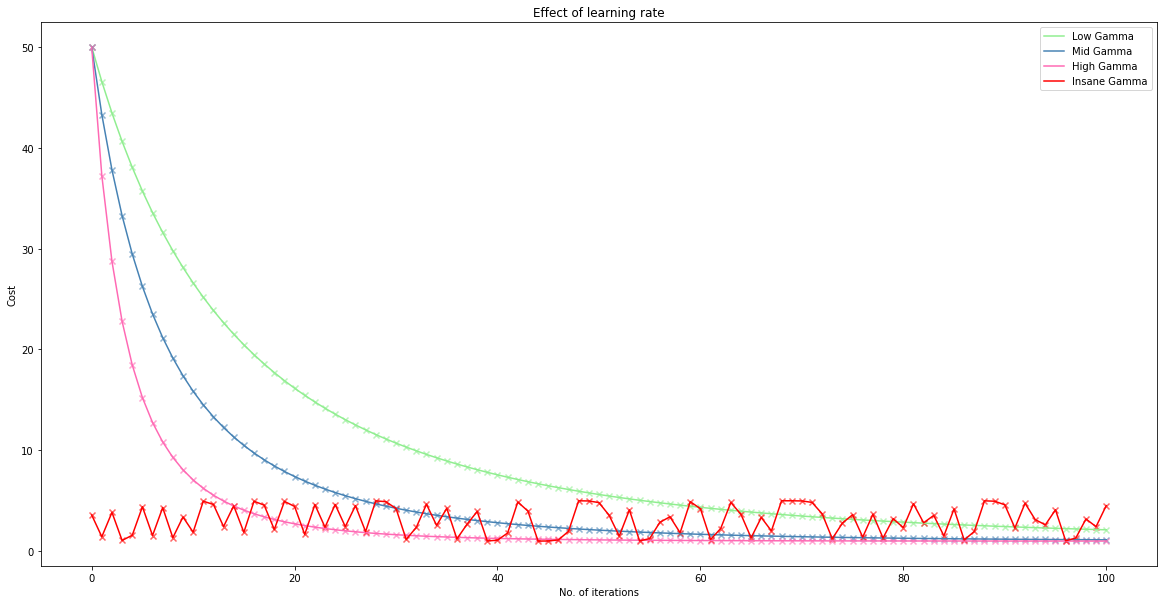

In [20]:
#Running Gradient Descent 3 times:
n = 100
low_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier = 0.0005, precision = 0.0001, max_iter = n)
#Gamma is referred to as learning rate.
mid_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier = 0.001, precision = 0.0001, max_iter = n)
high_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier = 0.002, precision = 0.0001, max_iter = n)
#Experimental:
insane_gamma = gradient_descent(derivative_func = dg, initial_guess = 1.9, multiplier = 0.25, precision = 0.0001, max_iter = n)

plt.figure(figsize = [20, 10]) #Setting height & width of plot to 20x10.

#figure 1 (effect of learning rate)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Effect of learning rate')

#Values for out chart:
#1. Y axis data: converting lists to numpy array:
low_values = np.array(low_gamma[1]) #In low_gamma tuple, x_list is stored at index 1 (position 2)
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
insane_values = np.array(insane_gamma[1])
#2. X axis data: Create a list from 0 to n+1:
iteration_list = [x for x in range(0, n+1)] #OR iteration_list = list(range(0, n+1))

#Low Gamma
plt.plot(iteration_list, g(low_values), color = 'lightgreen',  label = 'Low Gamma')
plt.scatter(iteration_list, g(low_values), marker = 'x', color = 'lightgreen', alpha = 0.6)

#Mid Gamma
plt.plot(iteration_list, g(mid_values), color = 'steelblue', label = 'Mid Gamma')
plt.scatter(iteration_list, g(mid_values), marker = 'x', color = 'steelblue', alpha = 0.6)

#High Gamma
plt.plot(iteration_list, g(high_values), color = 'hotpink', label = 'High Gamma')
plt.scatter(iteration_list, g(high_values), marker = 'x', color = 'hotpink', alpha = 0.6)

#High Gamma
plt.plot(iteration_list, g(insane_values), color = 'red', label = 'Insane Gamma')
plt.scatter(iteration_list, g(insane_values), marker = 'x', color = 'red', alpha = 0.6)

plt.legend()
plt.show()

## Data Visualization with 3D charts

Cost function: $f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$

In [21]:
#Cost function:
def f(x, y): #Function overloading, the above code with function f() will not be disturbed as this one needs 2 params to be called.
    return 1/(3**(-x**2 - y**2) + 1)

In [22]:
#Making X & Y data:
x_4 = np.linspace(-2, 2, 200)
y_4 = np.linspace(-2, 2, 200)

#Viewing shapes of np arrays x_4 & y_4:
print('Shape of x_4 array:', x_4.shape)
print('Shape of y_4 array:', y_4.shape)

Shape of x_4 array: (200,)
Shape of y_4 array: (200,)


1D array with 200 rows
This type of DS is often called **Vector**

/tmp/ipykernel_91456/998605323.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d') #GCA - Get current axis


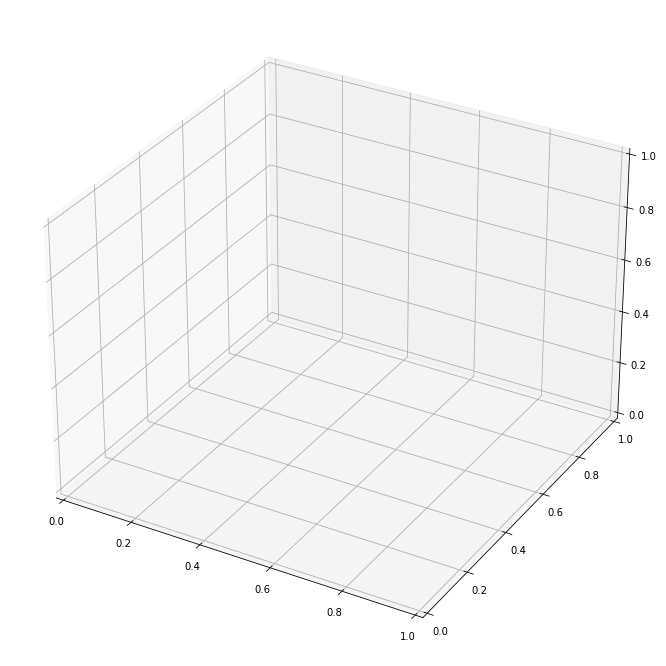

In [23]:
#Generating 3D plots:
fig = plt.figure(figsize = [16, 12]) #We are storing the 'Figure' retrned from plt.figure
ax = fig.gca(projection = '3d') #GCA - Get current axis

#ax.plot_surface(x_4, y_4, f(x_4, y_4))
#The above line of code will not work as gca requires 2D arrays as input in X, Y, Z.

In [24]:
#Modifying x_4, y_4
x_4, y_4 = np.meshgrid(x_4, y_4) #Meshgrid returns coordinate matrices from coordinate vectors.
print('Shape of matrix after meshgrid:', x_4.shape)

Shape of matrix after meshgrid: (200, 200)


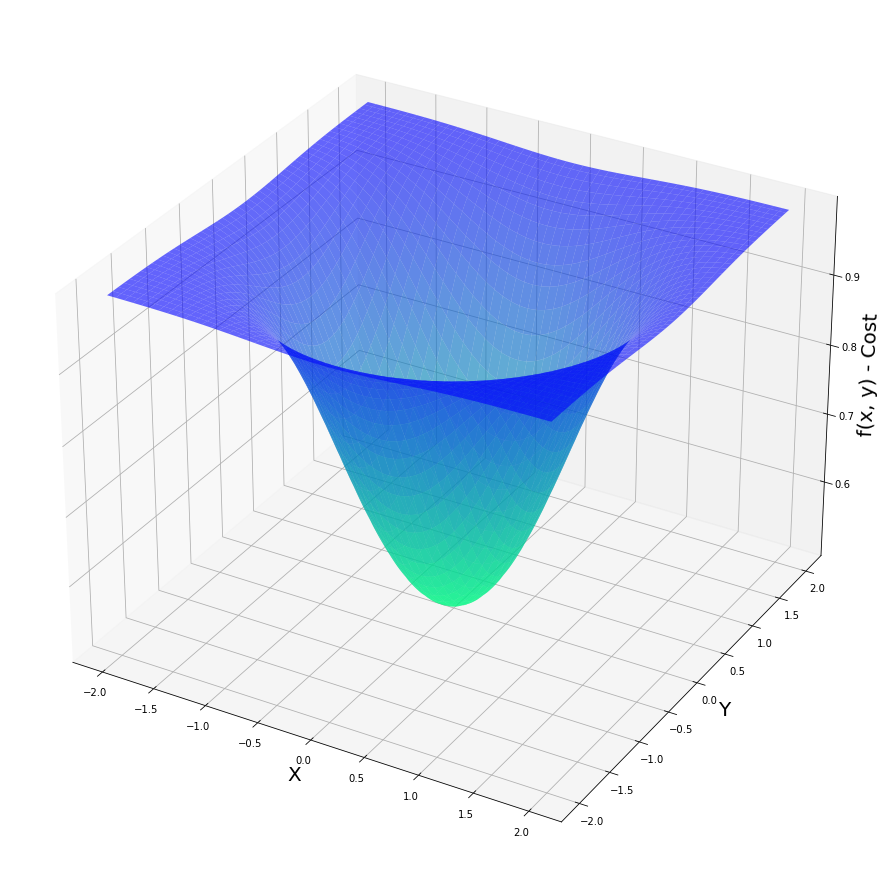

In [25]:
#%%capture
fig = plt.figure(figsize = [16, 16])
ax = fig.add_subplot(projection = '3d') #Updated! GCA(get current axis was deprecated in version 3.4 # Notice no warnings

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(x, y) - Cost', fontsize = 20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.winter_r, alpha = 0.6)

plt.show()

## Partial Derivatives & Symbolic Computation

$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2}+1 \right)^2}$
$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2}+1 \right)^2}$

In [26]:
a, b = symbols('x, y')
print("Our cost function:", f(a, b)) # a & b are the new symbols for x and y

#Partial derivatives using sympy
print("Partial derivative of f(a, b) wrt a:", diff(f(a, b), a))
print("Partial derivative of f(a, b) wrt b:", diff(f(a, b), b))

#Evaluating f(a, b) at any point using sympy
print("f(a, b) at (1.8, 1.0):", f(a, b).evalf(subs={a:1.8, b:1.0}))

Our cost function: 1/(3**(-x**2 - y**2) + 1)
Partial derivative of f(a, b) wrt a: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial derivative of f(a, b) wrt b: 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
f(a, b) at (1.8, 1.0): 0.990604794032582


In [27]:
#Slope wrt to x at (1.8, 1):
print("Slope wrt to x at (1.8, 1):", diff(f(a, b), a).evalf(subs={a:1.8, b:1}))

Slope wrt to x at (1.8, 1): 0.0368089716197505


## Batch Gradient Descent with Sympy

In [28]:
#Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) #Initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    
#Results:
print("Values in gradient array:", gradients)
print("Minimum occurs at (x, y):", (params[0], params[1]))
print("Cost at minimum:", f(a, b).evalf(subs={a:params[0], b:params[1]}))  #Or can be f(params[0], params[1])

Values in gradient array: [0.000461440542096373 0.000256355856720208]
Minimum occurs at (x, y): (0.000793898510134722, 0.000441054727852623)
Cost at minimum: 0.500000226534985


## Batch Gradient Descent (without Sympy)

In [29]:
#Partial derivative function:
#wrt x:
def fpx(x, y):
    return 2*3**(-x**2 - y**2)*x*np.log(3)/(3**(-x**2 - y**2) + 1)**2

#wrt y:
def fpy(x, y):
    return 2*3**(-x**2 - y**2)*y*np.log(3)/(3**(-x**2 - y**2) + 1)**2

#Instead of importing log from math, we used np.log to have less imports

In [30]:
#Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) #Initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    
#Results:
print("Values in gradient array:", gradients)
print("Minimum occurs at (x, y):", (params[0], params[1]))
print("Cost at minimum:", f(a, b).evalf(subs={a:params[0], b:params[1]}))  #Or can be f(params[0], params[1])

Values in gradient array: [0.00046144 0.00025636]
Minimum occurs at (x, y): (0.0007938985101347202, 0.0004410547278526219)
Cost at minimum: 0.500000226534985


Calculating time difference in both methods:

In [31]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])

startTime = datetime.now()
for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
print(datetime.now() - startTime)

startTime = datetime.now()
for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
print(datetime.now() - startTime)

0:00:01.565457
0:00:00.830440


It took less than half time!

## Graphing 3D Gradient Descent, & Adv. Numpy Arrays

Values in gradient array: [0.00046144 0.00025636]
Minimum occurs at (x, y): (0.0007938985101347202, 0.0004410547278526219)
Cost at minimum: 0.500000226534985


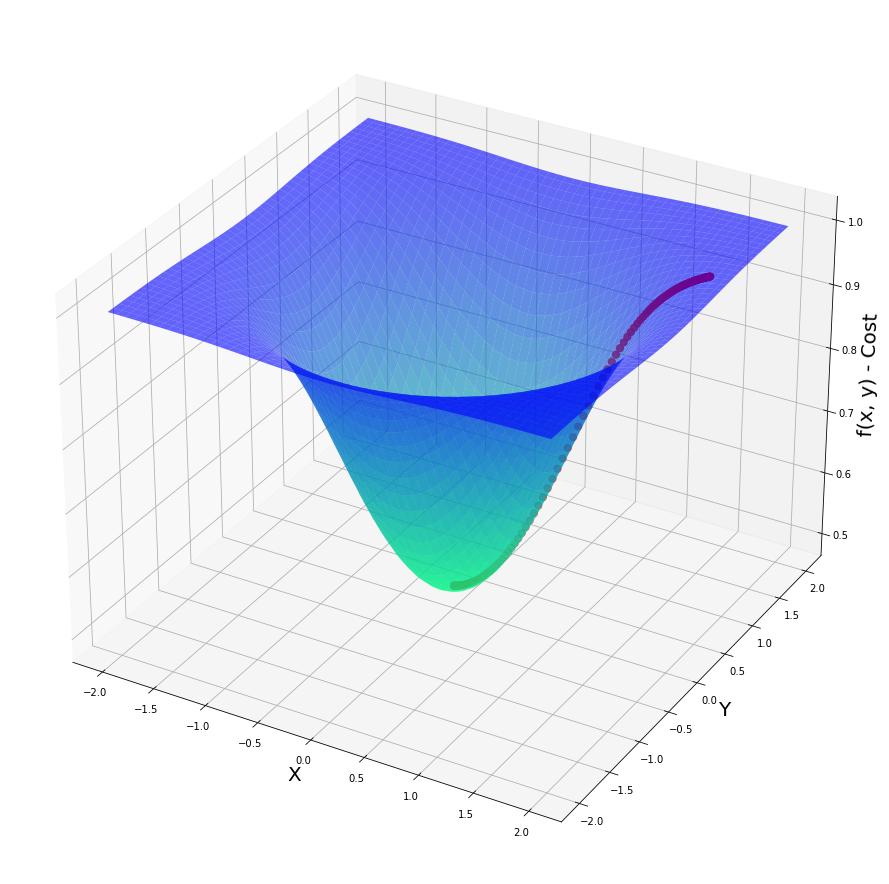

In [32]:
#Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) #Initial guess
values_array = params.reshape(1, 2) #converting 1D array to 2D array
#Basically to keep the X & Y in different dimensions

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    
#Results:
print("Values in gradient array:", gradients)
print("Minimum occurs at (x, y):", (params[0], params[1]))
print("Cost at minimum:", f(a, b).evalf(subs={a:params[0], b:params[1]}))  #Or can be f(params[0], params[1])

#Plots:
fig = plt.figure(figsize = [16, 16])
ax = fig.add_subplot(projection = '3d') #Updated! GCA(get current axis was deprecated in version 3.4 # Notice no warnings

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(x, y) - Cost', fontsize = 20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.winter_r, alpha = 0.6)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), color="red", s=50)

plt.show()

In [33]:
#Advanced numpy array practice

#1 row, 2 columns:
kirk = np.array([['Captain', 'Guitar']])
print("Shape:", kirk.shape)

#2 rows, 2 columns:
hs_band = np.array([['Black Thought', 'MC'], ['Quest Love', 'Drums']])
print("Shape:", hs_band.shape)

#Selecting particular item in multidimensional array:
print(hs_band[0][0])

the_roots = np.append(arr = hs_band, values = kirk, axis = 0)
print("Shape:", the_roots.shape)
#Keep in mind that the shape matters when appending to an array
#Example: aboce we cannot append kirk keeping axis 1 as kirk has just 1 row

print("Band members:", the_roots[:, 0]) #Select all values in row and 1st column from each row

# the_roots = np.append(arr = the_roots, values = [["Malik B", "MC"]], axis = 0)
# print("Roles:", the_roots[:, 1])
#OR
the_roots = np.concatenate((the_roots, [["Malik B", "MC"]]), axis = 0)
print("Roles:", the_roots[:, 1])

Shape: (1, 2)
Shape: (2, 2)
Black Thought
Shape: (3, 2)
Band members: ['Black Thought' 'Quest Love' 'Captain']
Roles: ['MC' 'Drums' 'Guitar' 'MC']


## Mean Squared Error (MSE):
$RSS = \sum_{i=1}^{n} \big(y^{(i)}-h_\theta x^{(i)} \big)^2$
\
$MSE =\frac{1}{n} \cdot \sum_{i=1}^{n} \big(y^{(i)}-h_\theta x^{(i)} \big)^2$
<p style="text-align: center;">Alternative notation</p>
$MSE =\frac{1}{n} \cdot \sum_{i=1}^{n} \big(y-\hat{y} \big)^2$

The difference b/w rss and MSE is pretty obvious as we might not encounter overflow error in mse as we are dividing the RSS by number of samples

In [34]:
#Making sample data:
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print("Shape of X & Y:", x_5.shape, y_5.shape)

Shape of X & Y: (7, 1) (7, 1)


Quick Linear regression using sklearn

In [35]:
regr = LinearRegression()
regr.fit(x_5, y_5)

print("Theta 0:", regr.intercept_[0], "\nTheta1: ", regr.coef_[0][0])

Theta 0: 0.8475351486029536 
Theta1:  1.2227264637835915


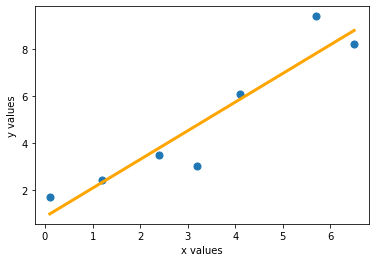

In [36]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color = "orange", linewidth = 3)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [37]:
# y_hat = theta0 + theta1*x

y_hat = regr.intercept_[0] + regr.coef_[0][0]*x_5 #You can also use static vvalues instead of regr.intercept and coef (The ones we printed 2 cells above)
print("Estimated values by regression: \n", y_hat)
print("Real y values: \n", y_5)

Estimated values by regression: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Real y values: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [38]:
# MSE function:
def MSE(y, y_hat):
    #return (1/y.size) * sum((y - y_hat)**2) #OR
    return np.average((y - y_hat)**2, axis=0)

In [39]:
print("Calculated MSE:", MSE(y_5, y_hat))

Calculated MSE: [0.94796558]


In [40]:
print("MSE by sklearn:", mean_squared_error(y_5, regr.predict(x_5)))

MSE by sklearn: 0.9479655759794577


## 3D Plot for MSE cost function

Making data for thetas:

In [41]:
nr_thetas = 200
th_0 = np.linspace(-1, 3, nr_thetas)
th_1 = np.linspace(-1, 3, nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

In [42]:
#2D array of zeroes
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = MSE(y_5, y_hat)
print("Shape of plot_t0, plot_t1:", plot_t0.shape, plot_t1.shape)
print("Shape of plot_cost:", plot_cost.shape)

Shape of plot_t0, plot_t1: (200, 200) (200, 200)
Shape of plot_cost: (200, 200)


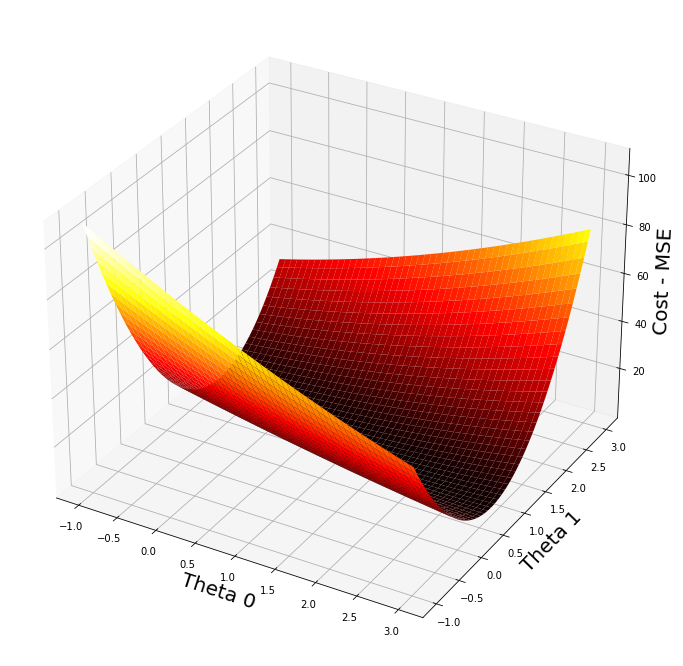

In [43]:
#Plotting MSE
fig = plt.figure(figsize = [16, 12])
#ax = fig.gca(projection="3d")
ax = fig.add_subplot(projection = "3d") #Updated! GCA(get current axis was deprecated in version 3.4 # Notice no warnings

ax.set_xlabel("Theta 0", fontsize = 20)
ax.set_ylabel("Theta 1", fontsize = 20)
ax.set_zlabel("Cost - MSE", fontsize = 20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [44]:
ij_min = np.unravel_index(indices = plot_cost.argmin(), shape = plot_cost.shape)
print("Min occurs at:", ij_min)
print("Min value of plot_cost:", plot_cost.min())
print("Min MSE for Theta 0 at plot_t0[111][91]:", plot_t0[111][91])
print("Min MSE for Theta 0 at plot_t1[111][91]:", plot_t1[111][91])

Min occurs at: (111, 91)
Min value of plot_cost: 0.9483826526747164
Min MSE for Theta 0 at plot_t0[111][91]: 0.829145728643216
Min MSE for Theta 0 at plot_t1[111][91]: 1.2311557788944723


## Gradient Descent on MSE

<img src="MSE_Denotation.png">
<img src="MSE_Simplified.png">

$MSE =\frac{1}{n} \cdot \sum_{i=1}^{n} \big(y^2 - 2\theta_0y - 2\theta_1xy + \theta_0^2 +2\theta_0\theta_1x + \theta_1^2x^2 \big)$
$\frac{\partial MSE}{\partial \theta_0} = \frac{-2}{n} \cdot \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1x^{(i)} \big)$
$\frac{\partial MSE}{\partial \theta_1} = \frac{-2}{n} \cdot \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1x^{(i)} \big) \big( x^{(i)} \big)$

In [45]:
#x Values, y values, array of theta parameters (theta0 at index 0 & theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n)*sum(y-thetas[0]-thetas[1]*x)
    theta1_slope = (-2/n)*sum((y-thetas[0]-thetas[1]*x)*(x))
    #return np.array([theta0_slope[0], [theta1_slope[0]])
    #return np.append(arr = theta0_slope, values = theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [46]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

#Collecting Data for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = MSE(y_5, (thetas[0]+thetas[1]*x_5))

for i in range(1000):
    thetas = thetas - multiplier*grad(x_5, y_5, thetas)
    #Appending new values to our array
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr = mse_vals, values = MSE(y_5, (thetas[0]+thetas[1]*x_5)))

print("Min occurs at Theta 0:", thetas[0])
print("Min occurs at Theta 1:", thetas[1])
print("MSE is:", MSE(y_5, (thetas[0]+thetas[1]*x_5)))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


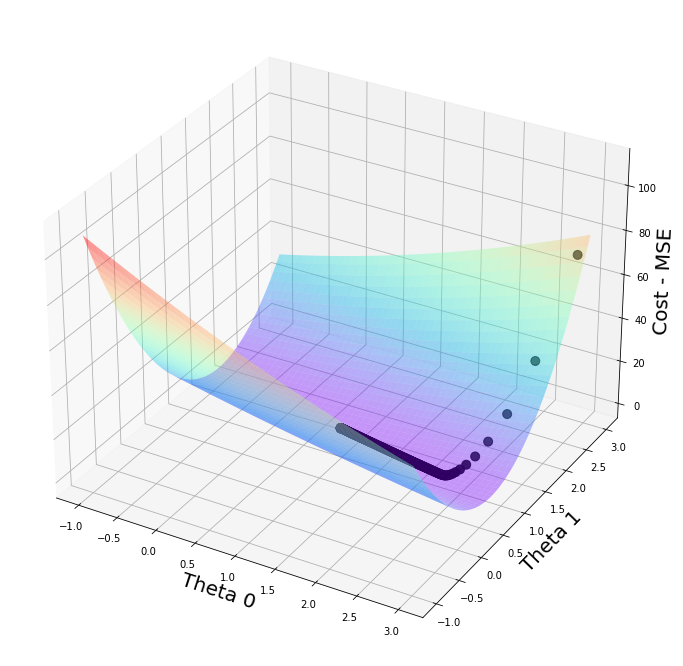

In [47]:
#Plotting MSE
fig = plt.figure(figsize = [16, 12])
#ax = fig.gca(projection="3d")
ax = fig.add_subplot(projection = "3d") #Updated! GCA(get current axis was deprecated in version 3.4 # Notice no warnings

ax.set_xlabel("Theta 0", fontsize = 20)
ax.set_ylabel("Theta 1", fontsize = 20)
ax.set_zlabel("Cost - MSE", fontsize = 20)
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color="black")

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()